# HD AI Challenge Data EDA

## Basic Settings

### Import libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [9]:
data_info = pd.read_csv('../data/data_info.csv')
data_info

,Feature Name,Description,단위,비고
0,ARI_CO,도착항의 소속국가(도착항 앞 2글자),NaN,NaN
1,ARI_PO,도착항의 항구명(도착항 뒤 글자),NaN,NaN
2,SHIP_TYPE_CATEGORY,선종 통합 바탕으로 5대 선종으로 분류,NaN,NaN
3,DIST,정박지(ber_port)와 접안지 사이의 거리,km,NaN
4,ATA,anc_port에 도착한 시점의 utc. 실제 정박 시각(Actual Time of...,hour,NaN
5,ID,선박식별 일련번호,NaN,NaN
6,BREADTH,선박의 폭,m,NaN
7,BUILT,선박의 연령,year,NaN
8,DEADWEIGHT,선박의 재화중량톤수,ton,NaN
9,DEPTH,선박의 깊이,m,NaN


In [4]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
sample_submission_df = pd.read_csv('../data/sample_submission.csv')

In [6]:
print(train_df.columns)
train_df.head()

Index(['SAMPLE_ID', 'ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'DIST', 'ATA',
       'ID', 'BREADTH', 'BUILT', 'DEADWEIGHT', 'DEPTH', 'DRAUGHT', 'GT',
       'LENGTH', 'SHIPMANAGER', 'FLAG', 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE',
       'BN', 'ATA_LT', 'DUBAI', 'BRENT', 'WTI', 'BDI_ADJ', 'PORT_SIZE',
       'CI_HOUR'],
      dtype='object')


,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR
0,TRAIN_000000,CN,EKP8,Bulk,30.736578,2020-10-15 4:03,Z517571,30.0,28,73100,...,3.77,15.9,2.730798,12,42.01,43.16,40.96,1407.668330,0.001660,3.048333
1,TRAIN_000001,CN,EUC8,Container,63.220425,2019-09-17 2:55,U467618,30.0,15,37900,...,-6.72,24.5,4.289058,10,67.53,64.55,59.34,2089.046774,0.001614,17.138611
2,TRAIN_000002,CN,NGG6,Container,90.427421,2019-02-23 6:43,V378315,50.0,7,115000,...,0.00,9.4,0.000000,14,65.30,66.39,56.94,603.193047,0.001743,98.827500
3,TRAIN_000003,JP,TMR7,Cargo,0.000000,2020-09-18 22:06,B726632,10.0,33,1490,...,-7.31,22.1,4.693735,7,43.02,43.15,41.11,1169.853455,0.000069,0.000000
4,TRAIN_000004,RU,NNC2,Container,8.813725,2022-08-13 12:57,D215135,30.0,10,27600,...,2.31,22.8,2.345875,14,90.45,93.65,88.11,1107.944894,0.000197,96.030556


In [7]:
print(test_df.columns)
test_df.head()

Index(['SAMPLE_ID', 'ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'DIST', 'ATA',
       'ID', 'BREADTH', 'BUILT', 'DEADWEIGHT', 'DEPTH', 'DRAUGHT', 'GT',
       'LENGTH', 'SHIPMANAGER', 'FLAG', 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE',
       'BN', 'ATA_LT', 'DUBAI', 'BRENT', 'WTI', 'BDI_ADJ', 'PORT_SIZE'],
      dtype='object')


,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE
0,TEST_000000,JP,HYG5,Tanker,9.508139,2022-08-27 8:29,R721438,20.0,9,5510,...,0.18,0.63,26.8,0.850060,17,97.88,96.49,89.55,766.977634,0.000256
1,TEST_000001,SG,GIW5,Container,24.186684,2022-03-27 20:57,G185231,40.0,14,109000,...,-0.81,-0.77,27.5,1.213528,4,98.14,104.64,100.60,1655.006791,0.002615
2,TEST_000002,TW,EKP8,Cargo,0.000000,2023-01-18 2:06,P862781,20.0,14,13700,...,-6.25,-12.57,16.1,6.557436,10,83.70,84.98,79.48,682.595117,0.000427
3,TEST_000003,JP,HYG5,Bulk,0.000000,2016-08-02 0:59,B415437,10.0,18,2840,...,NaN,NaN,NaN,NaN,9,38.85,41.80,39.51,629.378100,0.000256
4,TEST_000004,SG,GIW5,Container,19.834186,2023-01-24 0:27,J412562,30.0,23,30700,...,1.58,-4.47,23.8,3.180123,8,83.88,86.13,80.13,563.101921,0.002615


In [8]:
sample_submission_df

,SAMPLE_ID,CI_HOUR
0,TEST_000000,0
1,TEST_000001,0
2,TEST_000002,0
3,TEST_000003,0
4,TEST_000004,0
...,...,...
244984,TEST_244984,0
244985,TEST_244985,0
244986,TEST_244986,0
244987,TEST_244987,0


### Check data information

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367441 entries, 0 to 367440
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SAMPLE_ID           367441 non-null  object 
 1   ARI_CO              367441 non-null  object 
 2   ARI_PO              367441 non-null  object 
 3   SHIP_TYPE_CATEGORY  367441 non-null  object 
 4   DIST                367441 non-null  float64
 5   ATA                 367441 non-null  object 
 6   ID                  367441 non-null  object 
 7   BREADTH             367440 non-null  float64
 8   BUILT               367441 non-null  int64  
 9   DEADWEIGHT          367441 non-null  int64  
 10  DEPTH               367440 non-null  float64
 11  DRAUGHT             367440 non-null  float64
 12  GT                  367441 non-null  int64  
 13  LENGTH              367440 non-null  float64
 14  SHIPMANAGER         367441 non-null  object 
 15  FLAG                367441 non-nul

In [21]:
train_df.describe()

,DIST,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR
count,367441.000000,367440.000000,367441.000000,367441.000000,367440.000000,367440.000000,367441.000000,367440.000000,213955.000000,213955.000000,213076.000000,213955.000000,367441.000000,367441.000000,367441.00000,367441.000000,367441.000000,367441.000000,367441.000000
mean,19.315929,30.550239,14.746082,63588.867056,16.476540,11.086708,41346.606612,205.114468,-0.297587,-0.262955,18.867344,2.706476,11.837903,65.533814,67.55712,63.209494,1348.251333,0.000877,61.877118
std,30.903272,10.957441,7.040392,63558.705308,6.047015,4.600020,39311.578997,75.867383,3.365912,3.735113,9.727090,1.387629,6.645665,20.916641,20.98516,20.630433,738.961048,0.000838,170.575224
min,0.000000,10.000000,0.000000,100.000000,0.000000,0.000000,150.000000,20.000000,-25.330000,-21.450000,-32.200000,0.000000,0.000000,13.520000,19.33000,-37.630000,286.802297,0.000005,0.000000
25%,0.000000,20.000000,10.000000,14400.000000,10.000000,10.000000,10000.000000,150.000000,-2.150000,-2.280000,12.200000,1.804286,7.000000,50.020000,51.46000,48.360000,836.349201,0.000142,0.000000
50%,6.929929,30.000000,13.000000,47400.000000,20.000000,10.000000,30700.000000,190.000000,-0.130000,0.000000,21.600000,2.618063,12.000000,62.930000,64.62000,59.140000,1187.573732,0.000552,7.949444
75%,25.693063,40.000000,18.000000,81400.000000,20.000000,10.000000,52100.000000,260.000000,1.540000,2.000000,26.600000,3.556008,17.000000,76.880000,79.30000,74.250000,1660.987616,0.001614,49.153333
max,199.980651,60.000000,80.000000,404000.000000,30.000000,20.000000,237000.000000,400.000000,17.910000,29.690000,47.600000,11.179660,23.000000,127.860000,127.98000,123.700000,4795.865609,0.002615,2159.130556


<ipython-input-44-05d89cd2bb42>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_train = train_df.corr()


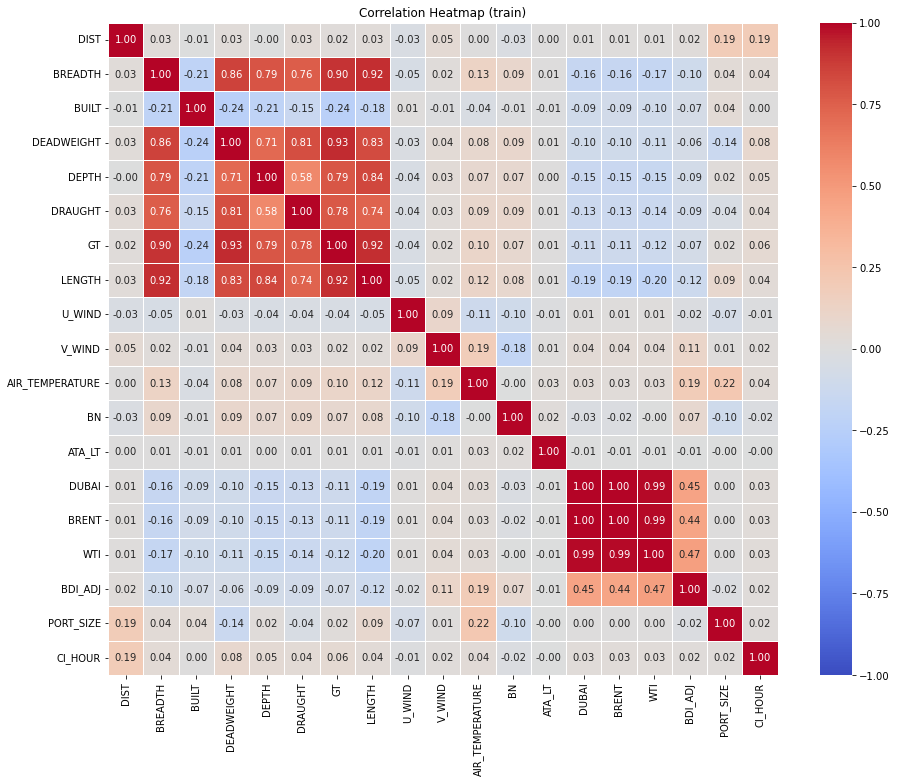

In [44]:
# Correlation matrix는 자동으로 numerical 데이터에 대해서만 계산됨
correlation_train = train_df.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(
    correlation_train, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=0.5,
    vmin=-1.0,
    vmax=1.0
)
plt.title('Correlation Heatmap (train)')
plt.show()

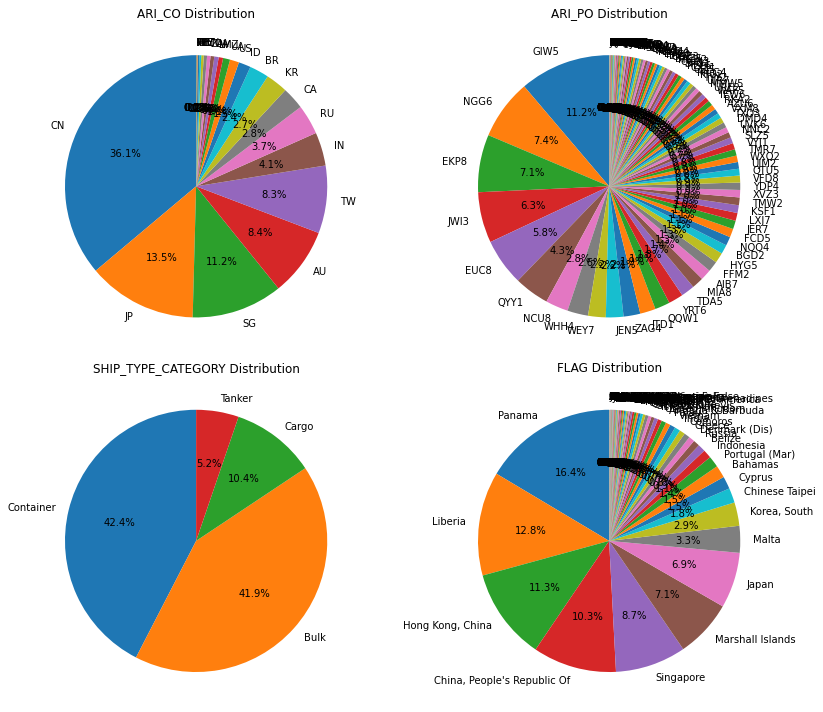

In [46]:
# 범주형 변수에 대한 빈도분석
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
counts_ari_co = train_df['ARI_CO'].value_counts()
plt.pie(counts_ari_co, labels=counts_ari_co.index, autopct='%1.1f%%', startangle=90)
plt.title('ARI_CO Distribution')

plt.subplot(2, 2, 2)
counts_ari_po = train_df['ARI_PO'].value_counts()
plt.pie(counts_ari_po, labels=counts_ari_po.index, autopct='%1.1f%%', startangle=90)
plt.title('ARI_PO Distribution')

plt.subplot(2, 2, 3)
counts_ship_type_category = train_df['SHIP_TYPE_CATEGORY'].value_counts()
plt.pie(counts_ship_type_category, labels=counts_ship_type_category.index, autopct='%1.1f%%', startangle=90)
plt.title('SHIP_TYPE_CATEGORY Distribution')

plt.subplot(2, 2, 4)
counts_flag = train_df['FLAG'].value_counts()
plt.pie(counts_flag, labels=counts_flag.index, autopct='%1.1f%%', startangle=90)
plt.title('FLAG Distribution')

plt.tight_layout()
plt.show()

In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244989 entries, 0 to 244988
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SAMPLE_ID           244989 non-null  object 
 1   ARI_CO              244989 non-null  object 
 2   ARI_PO              244989 non-null  object 
 3   SHIP_TYPE_CATEGORY  244989 non-null  object 
 4   DIST                244989 non-null  float64
 5   ATA                 244989 non-null  object 
 6   ID                  244989 non-null  object 
 7   BREADTH             244989 non-null  float64
 8   BUILT               244989 non-null  int64  
 9   DEADWEIGHT          244989 non-null  int64  
 10  DEPTH               244989 non-null  float64
 11  DRAUGHT             244989 non-null  float64
 12  GT                  244989 non-null  int64  
 13  LENGTH              244989 non-null  float64
 14  SHIPMANAGER         244989 non-null  object 
 15  FLAG                244989 non-nul

## Cleansing

### Missing values

- 모두 바람과 관련된 인자로 확인됨
  - U_WIND: 바람 u벡터
  - V_WIND: 바람 v벡터
  - AIR_TEMPERATURE: 기온
  - BN: 보퍼트 풍력 계급 (풍속과 직접 상관)

- 이들이 측정되지 않은 항구가 따로 정해져 있는 것으로 추측됨
  - test 데이터도 마찬가지

In [23]:
train_missing_columns = train_df.columns[train_df.isnull().sum() >= 10000]
print(train_df[train_missing_columns])

        U_WIND  V_WIND  AIR_TEMPERATURE        BN
0         0.14    3.77             15.9  2.730798
1        -3.16   -6.72             24.5  4.289058
2         0.00    0.00              9.4  0.000000
3         4.34   -7.31             22.1  4.693735
4         1.92    2.31             22.8  2.345875
...        ...     ...              ...       ...
367436     NaN     NaN              NaN       NaN
367437   -0.06    0.87             17.1  1.028558
367438   -0.63    3.36             31.7  2.557156
367439    3.74   -2.44             10.8  3.055715
367440    4.66   -0.84             19.8  3.177475

[367441 rows x 4 columns]


In [34]:
test_missing_columns = test_df.columns[test_df.isnull().sum() >= 10000]
print(test_df[test_missing_columns])

        U_WIND  V_WIND  AIR_TEMPERATURE        BN
0         0.18    0.63             26.8  0.850060
1        -0.81   -0.77             27.5  1.213528
2        -6.25  -12.57             16.1  6.557436
3          NaN     NaN              NaN       NaN
4         1.58   -4.47             23.8  3.180123
...        ...     ...              ...       ...
244984     NaN     NaN              NaN       NaN
244985    0.00    0.00             12.5  0.000000
244986     NaN     NaN              NaN       NaN
244987    1.64   -1.85             25.4  2.060279
244988   -0.14   -1.12             13.2  1.221572

[244989 rows x 4 columns]


- 결측값 1만 개 이상의 칼럼을 box plot으로 분석
  - 모두 박스가 작고 outlier 개수가 많음
  - 즉, 단순 평균치로 대체하기에 무리가 있음
  - K-NN 또는 예측 모델 활용 / 아니면 마스킹 기법의 사용 가능성 고려

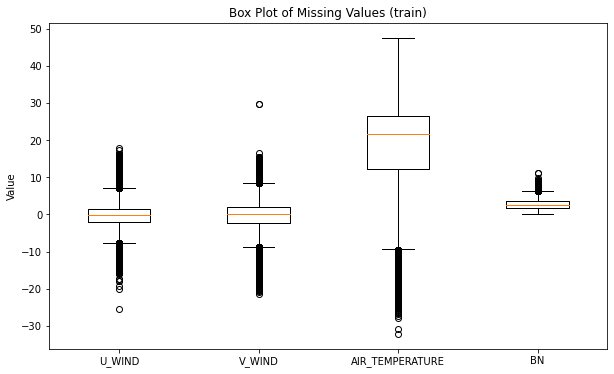

In [35]:
train_missing_columns = ['U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN']
train_missing = train_df[train_missing_columns].dropna()

plt.figure(figsize=(10, 6))
plt.boxplot(train_missing.values, labels=train_missing_columns)
plt.ylabel('Value')
plt.title('Box Plot of Columns with Missing Values (train)')
plt.show()

- 마스킹 기법 적용 가능성 파악을 위해 상관 분석 수행

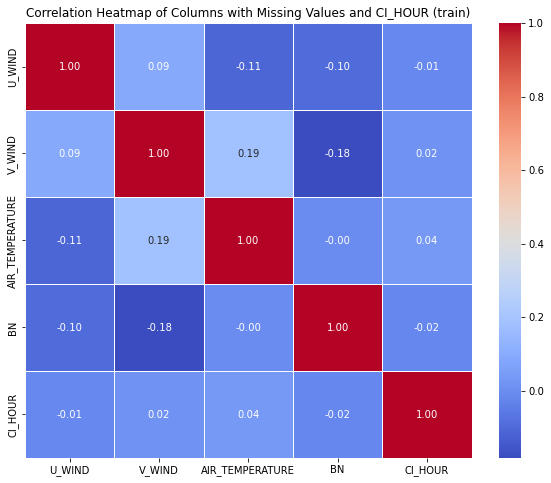

In [43]:
train_missing_plus_ci = train_df[train_missing_columns + ['CI_HOUR']].dropna()
correlation_tmpc = train_missing_plus_ci.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_tmpc, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Columns with Missing Values and CI_HOUR (train)')
plt.show()